In [124]:
import numpy as np
import matplotlib.pyplot as plt

#Nagel & Schreckenberg traffic simulation addapted from class that I'll use for each lane

class Lane:

    def __init__(self, road_length=100, car_density=0.2, prob_slow=0.5,
                 max_speed=5):
        '''
        Create a new traffic simulation object. Cars are distributed randomly
        along the road and start with random velocities.

        Inputs:

            road_length (int) The number of cells in the road. Default: 100.

            car_density (float) The fraction of cells that have a car on them.
              Default: 0.2.

            prob_slow (float) The probability that a car will randomly slow down
              by 1 during an update step. Default: 0.5.

            max_speed (int) The maximum speed in car cells per update step.
              Default: 5.
        '''
        self.road_length = road_length
        self.car_density = car_density
        self.max_speed = max_speed
        self.prob_slow = prob_slow

        # Create an empty road: -1 means empty in this simulation
        self.state = np.full(self.road_length+1, -1, dtype=int)
        # Choose random locations to place cars
        random_indexes = np.random.choice(
            range(self.road_length),
            size=int(round(car_density * self.road_length)),
            replace=False)
        # Give each car a random initial speed from 0 to max_speed
        self.state[random_indexes] = np.random.randint(
            0, self.max_speed + 1, size=len(random_indexes))

        self.state[-1]=0

        # Keep track of the time steps and average traffic flow at each step
        self.time_step = 0
        self.average_traffic_flow = []

    def update(self):
        '''
        Advance one time step in the simulation.
        '''

        # Update car speeds
        for i in range(self.road_length):
            if self.state[i] != -1:
                # Distance is the number of empty cells between this car and the
                # next car plus 1
                distance = 1
                while self.state[(i + distance)] == -1:
                    distance += 1
                # Acceleration
                if self.state[i] < self.max_speed:
                    self.state[i] += 1
                # Deceleration
                if self.state[i] >= distance:
                    self.state[i] = distance - 1
                # Randomization
                if (
                    (self.state[i] > 0) and
                    (np.random.uniform() < self.prob_slow)
                ):
                    self.state[i] -= 1

        # Move cars forward using their new speeds
        new_state = np.full(self.road_length+1, -1, dtype=int)
        new_state[-1] = 0
        for i in range(self.road_length):
            cell = self.state[i]
            if cell != -1:
                new_state[i + cell] = cell
        self.state = new_state

        # Update average traffic flow history
        self.average_traffic_flow.append(
            sum(self.state[self.state > 0]) / self.road_length)
        self.time_step += 1

    def display(self):
        '''
        Print out the current state of the simulation.
        '''
        print(''.join('.' if x == -1 else str(x) for x in self.state[:-1]))

    def getDensity(self):
        s = 0
        for i in self.state[:-1]:
            if i != -1:
                s+=1
                
        return s/self.road_length


sim = Lane(
    road_length=50, car_density=0.2, max_speed=5, prob_slow=0.5)
sim.state = sim.state.copy()
for i in range(20):
    sim.display()
    sim.update()

....1.....................51..0.......32.1.0.2...0
......2...................0.1..1......0.10.0...2.0
........2..................1..2.1......10.10....10
...........3................1.0..1.....00.00....00
..............3..............1.1...2...00.0.1...00
..................4..........0..1....2.00.0...2.00
......................4......0....2..0.00.0...0.00
...........................5..1.....2.10.1.1...100
.............................2.1....0.00..1.1..000
.............................0..1....100...1.1.000
.............................0....2..000....1.1000
.............................0......2000.....10000
..............................1.....0000.....00000
...............................1....000.1....00000
................................1...000...2..00000
.................................1..000.....200000
..................................1.000.....000000
...................................100.1....000000
...................................000...2..000000
...............................

In [85]:
#class for connecting multiple lanes 

class Node:
    
    def __init__(self, lanes_from, lanes_to):
        self.lanes_from = lanes_from
        self.lanes_to = lanes_to

    def removeFromQueue(self, dirFrom):

        arr = np.array([i for i in self.lanes_to.keys()])
        boolArr = arr != dirFrom
        newArr = arr[boolArr]
        newArr = arr[arr != dirFrom]

        dirTo = np.random.choice(newArr)

        if self.lanes_to[dirTo].state[0] == -1:
            self.lanes_from[dirFrom].state[-2] = -1
            self.lanes_to[dirTo].state[0] = 0
            

    def Move_to_new_lane(self):
        for dir,lane in self.lanes_from.items():
            if lane.state[-2] > -1:
                self.removeFromQueue(dir)
        

In [86]:
#class for running everything

class System:
    
    def __init__(self, nodes, lanes):
        self.nodes = nodes
        self.lanes = lanes


In [126]:
lanes = {'down':Lane(road_length=20),
         'up':Lane(road_length=20)}

nodes = [Node(lanes,lanes)]

for i in range(50):
    for dir,lane in lanes.items():
        print(i)
        lane.update()
        print(dir)
        lane.display()
        print('\n')
    for node in nodes:
        node.Move_to_new_lane()


0
down
.10.......0....4....


0
up
..0.10..2...........


1
down
.00.......0.......3.


1
up
..0.00.....3........


2
down
.00........1.......1


2
up
..0.0.1.......3.....


3
down
.0.1........1.......


3
up
.1.1.1.1..........4.


4
down
.0..1.........2.....


4
up
..1.1.1.1.........0.


5
down
.0....2..........3..


5
up
...1.10..1.........1


6
down
0.1......3........1.


6
up
....10.1..1.........


7
down
.1..2........4....0.


7
up
....0.1..2.1........


8
down
..1....3........3.0.


8
up
....0...20..1.......


9
down
....2.....3.....0.0.


9
up
....0...00...1......


10
down
......2.......4..1.1


10
up
.....1..00.....2....


11
down
.........3......2..2


11
up
.1....1.00........3.


12
down
............3......3


12
up
0.1....100........0.


13
down
................4..0


13
up
0..1...00.1........1


14
down
.1................20


14
up
.1...2.0.1.1........


15
down
...2..............0.


15
up
0.1...1.10..1.......


16
down
.....2............0.


16
up
.1..2.0.0.1..1......




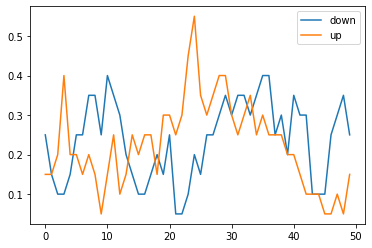

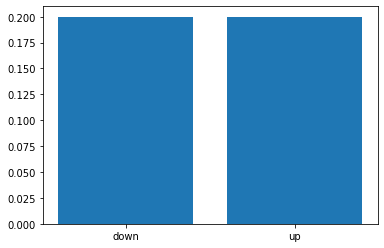

In [127]:
for dir,lane in lanes.items():
        plt.plot(range(50), lane.average_traffic_flow, label=dir)

plt.legend()
plt.show()

plt.bar(list(lanes.keys()),[i.getDensity() for i in lanes.values()])
plt.show()

In [128]:
#test with more roads

lanes = {'1d':Lane(road_length=20),
         '1u':Lane(road_length=20),
         '2r':Lane(road_length=20),
         '2l':Lane(road_length=20),
         '3d':Lane(road_length=20),
         '3u':Lane(road_length=20),
         '4r':Lane(road_length=20),
         '4l':Lane(road_length=20)}

nodes = [Node({'down':lanes['1u'],'right':lanes['2l']},{'down':lanes['1d'],'right':lanes['2r']}),
         Node({'down':lanes['3u'],'left':lanes['2r']},{'down':lanes['3d'],'left':lanes['2l']}),
         Node({'up':lanes['1d'],'right':lanes['4l']},{'up':lanes['1u'],'right':lanes['4r']}),
         Node({'up':lanes['3d'],'left':lanes['4r']},{'up':lanes['3u'],'left':lanes['4l']})]

for i in range(20):
    for dir,lane in lanes.items():
        print(i)
        lane.update()
        print(dir)
        lane.display()
        print('\n')
    for node in nodes:
        node.Move_to_new_lane()

#I need a better way of printing this
#but it looks like its working
#the number of cars in the beggining is the same as in the end :)

0
1d
...1....100.........


0
1u
0.....4.......3...2.


0
2r
........50...3.....4


0
2l
.....5.....2.....0.0


0
3d
0............1.0..2.


0
3u
..0.0..1...........1


0
4r
..1..2........0...3.


0
4l
........3.1....1...0


1
1d
.1..1...000.........


1
1u
.1........4.....2..1


1
2r
........0.1.....3..0


1
2l
.1.......4....3..0..


1
3d
0............0.0..0.


1
3u
..0.0....2..........


1
4r
....2...3.....0...0.


1
4l
........0..1.....2.0


2
1d
..1..1..00.1........


2
1u
0.1............5..2.


2
2r
.1......0...2....1.0


2
2l
...2.........4.1.0..


2
3d
0............0.0..0.


2
3u
...1.1......3.......


2
4r
......2....3..0....1


2
4l
.........1...2.....2


3
1d
....2.1.00...2......


3
1u
.1.1............1..1


3
2r
..1......1....2..0.0


3
2l
.....2........1.1.1.


3
3d
.1...........0..1.0.


3
3u
.1.0...2........4...


3
4r
........2....2.1....


3
4l
...........2...2...0


4
1d
.....1.100......3...


4
1u
00..1.............2.


4
2r
0..1.......2...1.0..


4
2l
.......2......0

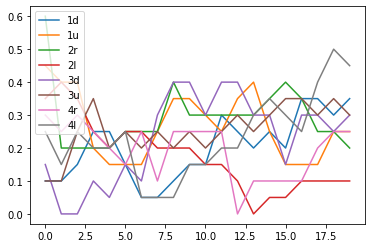

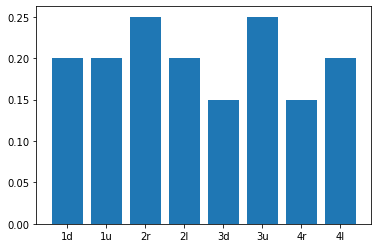

In [129]:
for dir,lane in lanes.items():
        plt.plot(range(20), lane.average_traffic_flow, label=dir)

plt.legend()
plt.show()

plt.bar(list(lanes.keys()),[i.getDensity() for i in lanes.values()])
plt.show()

In [145]:
#insert images of the streets
lanes = {'Farr_1_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
         'Farr_1_u':Lane(road_length=10, car_density=0.3, prob_slow=0.2, max_speed=8),
         'Farr_2_d':Lane(road_length=20, prob_slow=0.2, max_speed=8),
         'Farr_2_u':Lane(road_length=20, prob_slow=0.2, max_speed=8),
         'Farr_3_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
         'Farr_3_u':Lane(road_length=10, prob_slow=0.2, max_speed=8),

         'Cler_l':Lane(road_length=40, car_density=0.3, prob_slow=0.2, max_speed=8),
         'Cler_r':Lane(road_length=40, car_density=0.3, prob_slow=0.2, max_speed=8),
         
         'Rose_1_d':Lane(road_length=25, car_density=0.3, prob_slow=0.2, max_speed=8),
         'Rose_1_u':Lane(road_length=25, prob_slow=0.2, max_speed=8),
         'Rose_2_d':Lane(road_length=15, prob_slow=0.2, max_speed=8),
         'Rose_2_u':Lane(road_length=15, prob_slow=0.2, max_speed=8),
         'Rose_3_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
         'Rose_3_u':Lane(road_length=10, prob_slow=0.2, max_speed=8),
         
         'Warn_l':Lane(road_length=20, prob_slow=0.2),
         'Warn_r':Lane(road_length=20, prob_slow=0.2),

         'Rays_l':Lane(road_length=10, prob_slow=0.2),
         'Rays_r':Lane(road_length=10, prob_slow=0.2),
         
         'Toph_l':Lane(road_length=10, car_density=0.4, prob_slow=0.2),
         'Toph_r':Lane(road_length=10, car_density=0.4, prob_slow=0.2),
         
         'Bake_u':Lane(road_length=20, prob_slow=0.2),
         'Bake_d':Lane(road_length=20, prob_slow=0.2)}

nodes = [Node({'down':lanes['Rose_3_u'],     #1
                'right':lanes['Farr_1_u']},
              {'down':lanes['Rose_3_d'],
                'right':lanes['Farr_1_d']}),

         Node({'down':lanes['Rose_2_u'],     #2
                'right':lanes['Toph_l'],
                'up':lanes['Rose_3_d']},
              {'down':lanes['Rose_2_d'],
                'right':lanes['Toph_r'],
                'up':lanes['Rose_3_u']}),

         Node({'down':lanes['Bake_u'],      #3
                'right':lanes['Farr_2_u'],
                'left':lanes['Toph_r'],
                'up':lanes['Farr_1_d']},
              {'down':lanes['Bake_d'],
                'right':lanes['Farr_2_d'],
                'left':lanes['Toph_l'],
                'up':lanes['Farr_1_u']}),

         Node({'down':lanes['Rose_1_u'],     #4
                'right':lanes['Warn_l'],
                'up':lanes['Rose_2_d']},
              {'down':lanes['Rose_1_d'],
                'right':lanes['Warn_r'],
                'up':lanes['Rose_2_u']}),

         Node( {'right':lanes['Rays_l'],    #5
                'left':lanes['Warn_r'],
                'up':lanes['Bake_d']},
              {'right':lanes['Rays_r'],
                'left':lanes['Warn_l'],
                'up':lanes['Bake_u']}),

         Node({'down':lanes['Farr_3_u'],    #6
                'left':lanes['Rays_r'],
                'up':lanes['Farr_2_d']},
              {'down':lanes['Farr_3_d'],
                'left':lanes['Rays_l'],
                'up':lanes['Farr_2_u']}),

         Node({'up':lanes['Rose_1_d'],     #7
                'right':lanes['Cler_l']},
              {'up':lanes['Rose_1_u'],
                'right':lanes['Cler_r']}),

         Node({'up':lanes['Farr_3_d'],     #8
                'left':lanes['Cler_r']},
              {'up':lanes['Farr_3_u'],
                'left':lanes['Cler_l']}),]



In [146]:
for i in range(50):
    for dir,lane in lanes.items():
        print(i)
        lane.update()
        print(dir)
        lane.display()
        print('\n')
    for node in nodes:
        node.Move_to_new_lane()

0
Farr_1_d
.....4...3


0
Farr_1_u
.0..2...3.


0
Farr_2_d
0...3...3........3..


0
Farr_2_u
.......0..2.......70


0
Farr_3_d
..2...3...


0
Farr_3_u
.....2...3


0
Cler_l
...20.10.1..2.1.1..1........0.1........2


0
Cler_r
....0....4...3.....5.1..2..2......20000.


0
Rose_1_d
.10......60.1.....5..2..1


0
Rose_1_u
.........1.....1.0...3.0.


0
Rose_2_d
.....4....3..1.


0
Rose_2_u
..........2..20


0
Rose_3_d
.......1.1


0
Rose_3_u
......3.1.


0
Warn_l
.......4.....3...3.0


0
Warn_r
.......2....1.1....2


0
Rays_l
.....4...1


0
Rays_r
......0.1.


0
Toph_l
0...3...20


0
Toph_r
0....4.1.0


0
Bake_u
.....5......5...0..1


0
Bake_d
0.0..1.............5


1
Farr_1_d
........30


1
Farr_1_u
0.1....30.


1
Farr_2_d
.1.....3....4......2


1
Farr_2_u
........1....3....00


1
Farr_3_d
.....3...3


1
Farr_3_u
........3.


1
Cler_l
...0.10.1.1..10..1...2.......1..2.......


1
Cler_r
.1...1......3....4..1..2..2..2....0000.1


1
Rose_1_d
000......0.1..2....1....3


1
Rose_1_u
.1.........2..

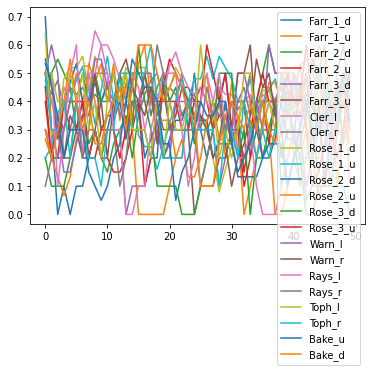

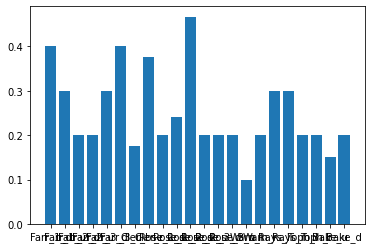

In [147]:
for dir,lane in lanes.items():
        plt.plot(range(50), lane.average_traffic_flow, label=dir)

plt.legend()
plt.show()
#this is not a good way of doing it


plt.bar(list(lanes.keys()),[i.getDensity() for i in lanes.values()])
plt.show()
#maybe this?


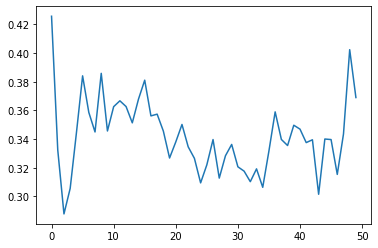

In [148]:
a = [i.average_traffic_flow for i in lanes.values()]

av_trafic = np.mean(a, axis=0)

plt.plot(range(len(av_trafic)), av_trafic)

In [149]:
def restart_nodes_lanes():
  lanes = {'Farr_1_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          'Farr_1_u':Lane(road_length=10, car_density=0.3, prob_slow=0.2, max_speed=8),
          'Farr_2_d':Lane(road_length=20, prob_slow=0.2, max_speed=8),
          'Farr_2_u':Lane(road_length=20, prob_slow=0.2, max_speed=8),
          'Farr_3_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          'Farr_3_u':Lane(road_length=10, prob_slow=0.2, max_speed=8),

          'Cler_l':Lane(road_length=40, car_density=0.3, prob_slow=0.2, max_speed=8),
          'Cler_r':Lane(road_length=40, car_density=0.3, prob_slow=0.2, max_speed=8),
          
          'Rose_1_d':Lane(road_length=25, car_density=0.3, prob_slow=0.2, max_speed=8),
          'Rose_1_u':Lane(road_length=25, prob_slow=0.2, max_speed=8),
          'Rose_2_d':Lane(road_length=15, prob_slow=0.2, max_speed=8),
          'Rose_2_u':Lane(road_length=15, prob_slow=0.2, max_speed=8),
          'Rose_3_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          'Rose_3_u':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          
          'Warn_l':Lane(road_length=20, prob_slow=0.2),
          'Warn_r':Lane(road_length=20, prob_slow=0.2),

          'Rays_l':Lane(road_length=10, prob_slow=0.2),
          'Rays_r':Lane(road_length=10, prob_slow=0.2),
          
          'Toph_l':Lane(road_length=10, car_density=0.4, prob_slow=0.2),
          'Toph_r':Lane(road_length=10, car_density=0.4, prob_slow=0.2),
          
          'Bake_u':Lane(road_length=20, prob_slow=0.2),
          'Bake_d':Lane(road_length=20, prob_slow=0.2)}

  nodes = [Node({'down':lanes['Rose_3_u'],     #1
                  'right':lanes['Farr_1_u']},
                {'down':lanes['Rose_3_d'],
                  'right':lanes['Farr_1_d']}),

          Node({'down':lanes['Rose_2_u'],     #2
                  'right':lanes['Toph_l'],
                  'up':lanes['Rose_3_d']},
                {'down':lanes['Rose_2_d'],
                  'right':lanes['Toph_r'],
                  'up':lanes['Rose_3_u']}),

          Node({'down':lanes['Bake_u'],      #3
                  'right':lanes['Farr_2_u'],
                  'left':lanes['Toph_r'],
                  'up':lanes['Farr_1_d']},
                {'down':lanes['Bake_d'],
                  'right':lanes['Farr_2_d'],
                  'left':lanes['Toph_l'],
                  'up':lanes['Farr_1_u']}),

          Node({'down':lanes['Rose_1_u'],     #4
                  'right':lanes['Warn_l'],
                  'up':lanes['Rose_2_d']},
                {'down':lanes['Rose_1_d'],
                  'right':lanes['Warn_r'],
                  'up':lanes['Rose_2_u']}),

          Node( {'right':lanes['Rays_l'],    #5
                  'left':lanes['Warn_r'],
                  'up':lanes['Bake_d']},
                {'right':lanes['Rays_r'],
                  'left':lanes['Warn_l'],
                  'up':lanes['Bake_u']}),

          Node({'down':lanes['Farr_3_u'],    #6
                  'left':lanes['Rays_r'],
                  'up':lanes['Farr_2_d']},
                {'down':lanes['Farr_3_d'],
                  'left':lanes['Rays_l'],
                  'up':lanes['Farr_2_u']}),

          Node({'up':lanes['Rose_1_d'],     #7
                  'right':lanes['Cler_l']},
                {'up':lanes['Rose_1_u'],
                  'right':lanes['Cler_r']}),

          Node({'up':lanes['Farr_3_d'],     #8
                  'left':lanes['Cler_r']},
                {'up':lanes['Farr_3_u'],
                  'left':lanes['Cler_l']}),]

  return nodes, lanes

av_trafics = []
densities = []

for _ in range(1000):
  nodes, lanes = restart_nodes_lanes()
  for i in range(50):
      for dir,lane in lanes.items():
          lane.update()
      for node in nodes:
          node.Move_to_new_lane()

  av_trafics.append(np.mean([i.average_traffic_flow for i in lanes.values()], axis=0))

  densities.append([i.getDensity() for i in lanes.values()])

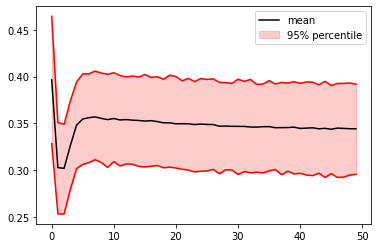

In [158]:
x = range(len(av_trafics[0]))
y = np.mean(av_trafics, axis=0)

percs = np.percentile(av_trafics,[2.5,97.5], axis=0)

plt.plot(x, y, c='black', label='mean')
plt.plot(x, percs[0], c='red')
plt.plot(x, percs[1], c='red')
plt.fill_between(x, percs[0], percs[1], alpha=0.2, color='red', label='95% percentile')

plt.legend()
plt.show()

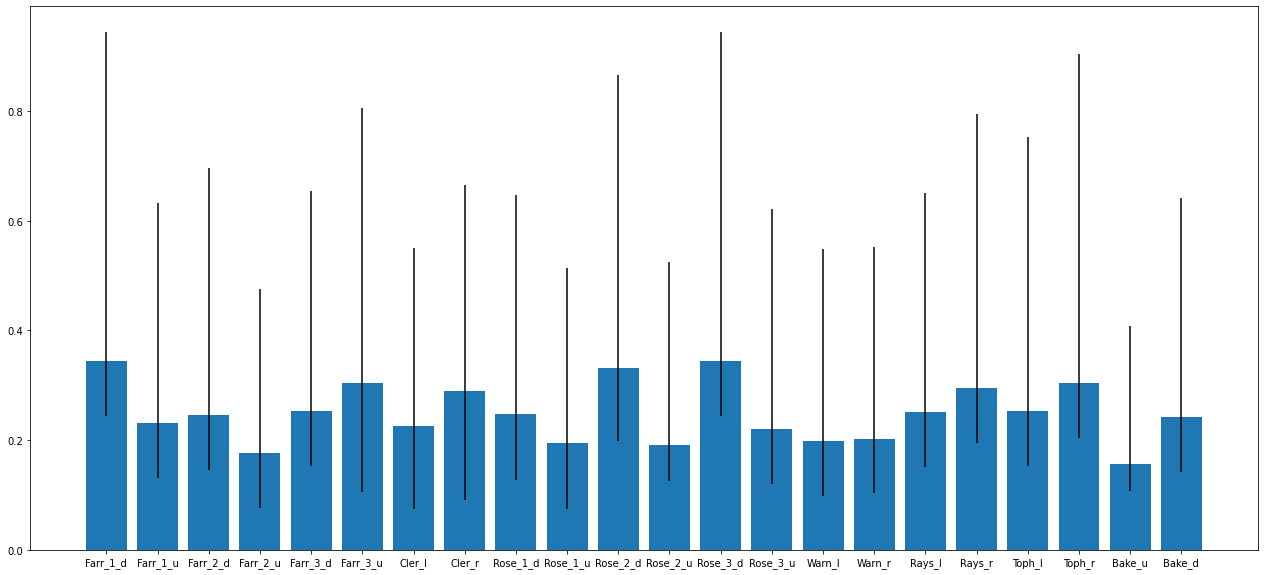

In [176]:
names = list(lanes.keys())
y = np.mean(densities, axis=0)
x = range(len(y))

percs = np.percentile(densities,[5,95], axis=0)

plt.figure(figsize=(22,10))

plt.bar(x,y, yerr=np.vstack([percs[0], percs[1]]), tick_label=names,)
plt.show()


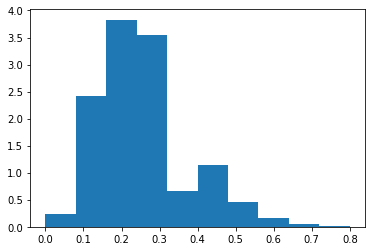

In [183]:
plt.hist(np.array(densities).flatten(), density=True)
plt.show()

In [184]:
#redo the nodes class to include the traffic lights

class Node:
    
    def __init__(self, lanes_from, lanes_to, t_control=None):
        self.lanes_from = lanes_from
        self.lanes_to = lanes_to
        self.time = 0
        self.traffic_light = 0
        self.t_control = t_control

    def removeFromQueue(self, dirFrom):

        arr = np.array([i for i in self.lanes_to.keys()])
        boolArr = arr != dirFrom
        newArr = arr[boolArr]
        newArr = arr[arr != dirFrom]

        dirTo = np.random.choice(newArr)

        if self.lanes_to[dirTo].state[0] == -1 and self.check_light(dirFrom, dirTo):
            self.lanes_from[dirFrom].state[-2] = -1
            self.lanes_to[dirTo].state[0] = 0
        
        self.time += 1
        self.update_trafic_light()

    def Move_to_new_lane(self):
        for dir,lane in self.lanes_from.items():
            if lane.state[-2] > -1:
                self.removeFromQueue(dir)
    
    def update_trafic_light(self):
        if self.time % 5 == 0:
            self.traffic_light = 1-self.traffic_light

    def check_light(self, dirFrom, dirTo):
        if self.t_control is None:
            return True
        
        if (dirFrom,dirTo) in self.t_control[self.traffic_light]:
            return True
        else:
            return False

        
    

In [186]:
def restart_nodes_lanes():
    lanes = {'Farr_1_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          'Farr_1_u':Lane(road_length=10, car_density=0.3, prob_slow=0.2, max_speed=8),
          'Farr_2_d':Lane(road_length=20, prob_slow=0.2, max_speed=8),
          'Farr_2_u':Lane(road_length=20, prob_slow=0.2, max_speed=8),
          'Farr_3_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          'Farr_3_u':Lane(road_length=10, prob_slow=0.2, max_speed=8),

          'Cler_l':Lane(road_length=40, car_density=0.3, prob_slow=0.2, max_speed=8),
          'Cler_r':Lane(road_length=40, car_density=0.3, prob_slow=0.2, max_speed=8),
          
          'Rose_1_d':Lane(road_length=25, car_density=0.3, prob_slow=0.2, max_speed=8),
          'Rose_1_u':Lane(road_length=25, prob_slow=0.2, max_speed=8),
          'Rose_2_d':Lane(road_length=15, prob_slow=0.2, max_speed=8),
          'Rose_2_u':Lane(road_length=15, prob_slow=0.2, max_speed=8),
          'Rose_3_d':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          'Rose_3_u':Lane(road_length=10, prob_slow=0.2, max_speed=8),
          
          'Warn_l':Lane(road_length=20, prob_slow=0.2),
          'Warn_r':Lane(road_length=20, prob_slow=0.2),

          'Rays_l':Lane(road_length=10, prob_slow=0.2),
          'Rays_r':Lane(road_length=10, prob_slow=0.2),
          
          'Toph_l':Lane(road_length=10, car_density=0.4, prob_slow=0.2),
          'Toph_r':Lane(road_length=10, car_density=0.4, prob_slow=0.2),
          
          'Bake_u':Lane(road_length=20, prob_slow=0.2),
          'Bake_d':Lane(road_length=20, prob_slow=0.2)}

    tc_2={0:[('up','down'),('up','right'),('down','up')],
          1:[('right','down'),('right','up'),('down','right')]}

    tc_4={0:[('up','down'),('up','right'),('down','up')],
          1:[('right','down'),('right','up'),('down','right')]}

    tc_6={0:[('up','down'),('down','left'),('down','up')],
          1:[('left','down'),('left','up'),('up','left')]}

    nodes = [Node({'down':lanes['Rose_3_u'],     #1
                  'right':lanes['Farr_1_u']},
                {'down':lanes['Rose_3_d'],
                  'right':lanes['Farr_1_d']}),

          Node({'down':lanes['Rose_2_u'],     #2
                  'right':lanes['Toph_l'],
                  'up':lanes['Rose_3_d']},
                {'down':lanes['Rose_2_d'],
                  'right':lanes['Toph_r'],
                  'up':lanes['Rose_3_u']},
                  tc_2),

          Node({'down':lanes['Bake_u'],      #3
                  'right':lanes['Farr_2_u'],
                  'left':lanes['Toph_r'],
                  'up':lanes['Farr_1_d']},
                {'down':lanes['Bake_d'],
                  'right':lanes['Farr_2_d'],
                  'left':lanes['Toph_l'],
                  'up':lanes['Farr_1_u']}),

          Node({'down':lanes['Rose_1_u'],     #4
                  'right':lanes['Warn_l'],
                  'up':lanes['Rose_2_d']},
                {'down':lanes['Rose_1_d'],
                  'right':lanes['Warn_r'],
                  'up':lanes['Rose_2_u']},
                  tc_4),

          Node( {'right':lanes['Rays_l'],    #5
                  'left':lanes['Warn_r'],
                  'up':lanes['Bake_d']},
                {'right':lanes['Rays_r'],
                  'left':lanes['Warn_l'],
                  'up':lanes['Bake_u']}),

          Node({'down':lanes['Farr_3_u'],    #6
                  'left':lanes['Rays_r'],
                  'up':lanes['Farr_2_d']},
                {'down':lanes['Farr_3_d'],
                  'left':lanes['Rays_l'],
                  'up':lanes['Farr_2_u']},
                  tc_6),

          Node({'up':lanes['Rose_1_d'],     #7
                  'right':lanes['Cler_l']},
                {'up':lanes['Rose_1_u'],
                  'right':lanes['Cler_r']}),

          Node({'up':lanes['Farr_3_d'],     #8
                  'left':lanes['Cler_r']},
                {'up':lanes['Farr_3_u'],
                  'left':lanes['Cler_l']}),]

    return nodes, lanes


av_trafics = []
densities = []

for _ in range(1000):
  nodes, lanes = restart_nodes_lanes()
  for i in range(50):
      for dir,lane in lanes.items():
          lane.update()
      for node in nodes:
          node.Move_to_new_lane()

  av_trafics.append(np.mean([i.average_traffic_flow for i in lanes.values()], axis=0))

  densities.append([i.getDensity() for i in lanes.values()])



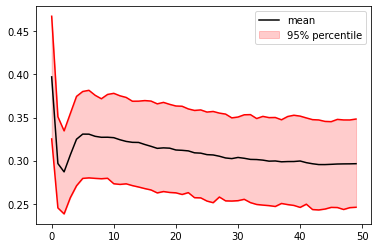

In [187]:
x = range(len(av_trafics[0]))
y = np.mean(av_trafics, axis=0)

percs = np.percentile(av_trafics,[2.5,97.5], axis=0)

plt.plot(x, y, c='black', label='mean')
plt.plot(x, percs[0], c='red')
plt.plot(x, percs[1], c='red')
plt.fill_between(x, percs[0], percs[1], alpha=0.2, color='red', label='95% percentile')

plt.legend()
plt.show()

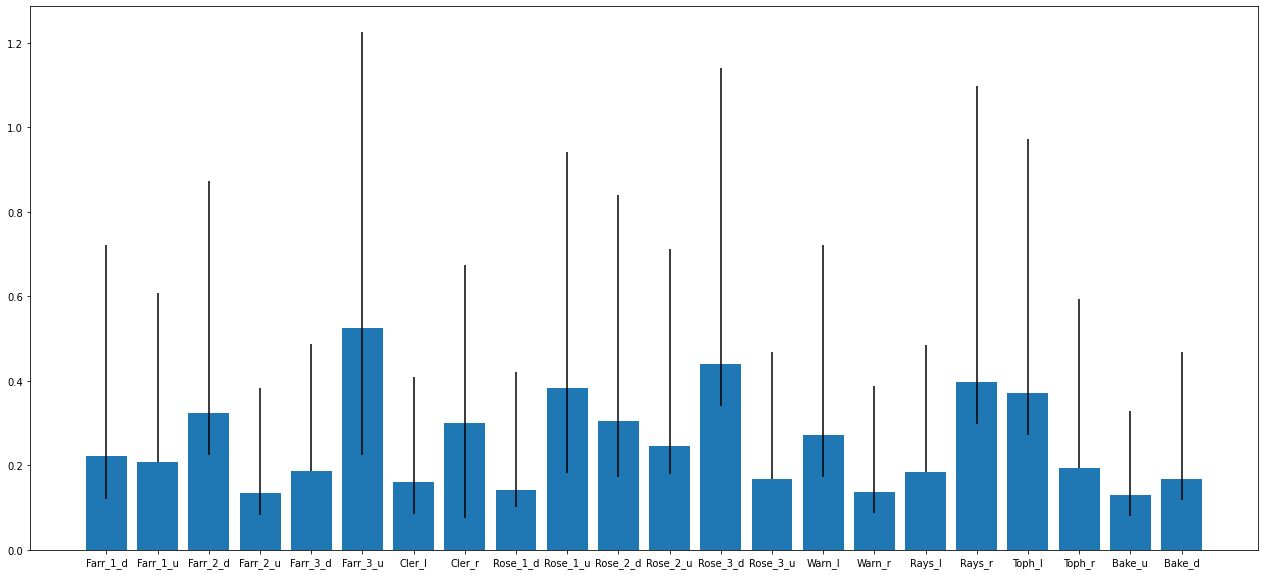

In [188]:
names = list(lanes.keys())
y = np.mean(densities, axis=0)
x = range(len(y))

percs = np.percentile(densities,[5,95], axis=0)

plt.figure(figsize=(22,10))

plt.bar(x,y, yerr=np.vstack([percs[0], percs[1]]), tick_label=names,)
plt.show()

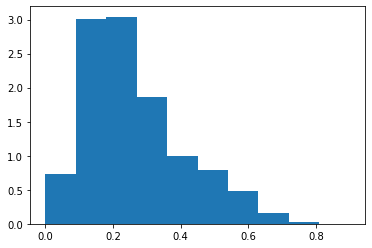

In [189]:
plt.hist(np.array(densities).flatten(), density=True)
plt.show()